Let's start with a review of the URI (Uniform Resource Identifier) syntax.

## Components of a URI (Uniform Resource Identifier)

A URI is a string of characters used to identify a resource over a network. A typical URI consists of the following components:

### 1. Scheme
The **scheme** defines the protocol or method used to access the resource. Examples include `http`, `https`, `ftp`, etc. It is followed by a colon (`:`).

- Example: `http` in `http://example.com`

### 2. Authority
The **authority** section usually contains the hostname and often the port number. It is prefixed by `//`.

- Example: `example.com:8080` in `http://example.com:8080/path`

### 3. Path
The **path** specifies the resource or the specific page that you want to access. It comes after the authority and is separated by slashes (`/`).

- Example: `/path/to/resource` in `http://example.com/path/to/resource`

### 4. Query
The **query** starts with a question mark (`?`) and is used to pass parameters to the resource. Multiple query parameters are separated by ampersands (`&`).

- Example: `?key1=value1&key2=value2` in `http://example.com/path?key1=value1&key2=value2`

### 5. Fragment
The **fragment** is an optional part that starts with a hash (`#`) and is used to identify a specific part of the resource, like a section within a page.

- Example: `#section1` in `http://example.com/path#section1`

Here's how these components fit together to form a complete URI:


- Complete Example: `http://example.com:8080/path/to/resource?key1=value1&key2=value2#section1`


  ### Retrieving Data from the API

Next we need a way to retrieve the data from the API. To achieve this, we first import Python's `requests` library, which allows us to make HTTP requests. Additionally, we import the `pprint` function from the `pprint` library to make the output more readable. Finally, we define the API endpoint we'll be interacting with, setting `API_ENDPOINT` to `https://testing-api.water.noaa.gov/hefs/`. Here's how you can do it:

```python
# start by importing the requests library
import requests
# import the pprint library to make the output more readable
from pprint import pprint
# define the api-endpoint
# Note: API Endpoint will change to https://api.water.noaa.gov/hefs/ after testing is complete
API_ENDPOINT = "https://testing-api.water.noaa.gov/hefs"
```

**Please change the endpoint to match the server you are interacting with.**

From here  you will only need to set the uri, fetch the data, and print the results.  Here is a template for the code:

```python
# set the uri
uri = "/v1/locations"
# fetch the data
r = requests.get(API_ENDPOINT + uri)
# print the results
pprint(r.json())
```



In [1]:
# start by importing the requests library
import requests
# import the pprint library to make the output more readable
from pprint import pprint
# define the api-endpoint
API_ENDPOINT = "https://testing-api.water.noaa.gov/hefs"

## The Header Endpoint: `/v1/headers/`

The `/v1/headers/` endpoint is a part of the RESTful API that provides access to various series data. By making HTTP requests to this URI, you can retrieve, update, or delete information related to data series stored in the backend. This endpoint by default returns time series sequentially.



In [2]:
# create a series request
uri = API_ENDPOINT + "/v1/headers/"

# get the response
response = requests.request("GET", uri, headers=None)
# print the response
print(response.headers)

{'Date': 'Wed, 25 Sep 2024 19:19:55 GMT', 'Content-Type': 'application/json', 'Content-Length': '860', 'Connection': 'keep-alive', 'Server': 'gunicorn', 'Vary': 'Accept, origin, Accept-Encoding', 'Allow': 'GET, HEAD, OPTIONS', 'Expires': 'Thu, 26 Sep 2024 01:19:55 GMT', 'Cache-Control': 'max-age=21600', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'same-origin', 'Cross-Origin-Opener-Policy': 'same-origin', 'Content-Encoding': 'gzip'}


## Pagination

The `/v1/headers/?limit=10&offset=10` endpoint is a specialized version of the `/v1/headers/` URI, which includes query parameters for pagination. In this case, the `limit` parameter is set to 10, which means the API will return a maximum of 10 records in the response.
The offset parameter is set to 10, which means the API will skip the first 10 records in the response. This is useful for retrieving large amounts of data, as it allows you to retrieve data in chunks.

In [3]:
# create a series request returning the second tranche of 10 series
uri = API_ENDPOINT + "/v1/headers/?limit=10&offset=10"
# get the response
response = requests.request("GET", uri, headers=None)
# print the response
pprint(response.content)

(b'{"count":14325834,"next":"https://testing-api.water.noaa.gov/hefs/v1/headers'
 b'/?limit=10&offset=20","previous":"https://testing-api.water.noaa.gov/hefs/v1'
 b'/headers/?limit=10","results":[{"id":"0d9addae-a5c6-42b9-ab65-a9a698272352",'
 b'"type":"instantaneous","location_id":"ABEC2","parameter_id":"QINE","ensemble'
 b'_id":"MEFP","ensemble_member_index":1990,"time_step_unit":"second","time_ste'
 b'p_multiplier":"21600","start_date_date":"2023-12-21","start_date_time":"12:0'
 b'0:00","end_date_date":"2024-01-20","end_date_time":"12:00:00","forecast_date'
 b'_date":"2023-12-21","forecast_date_time":"12:00:00","miss_val":null,"station'
 b'_name":"MALTA 5SE","lat":39.1638888889,"lon":-106.319444444,"x":-106.3194444'
 b'44,"y":39.1638888889,"units":"CFS","creation_date":"2023-12-21","creation_ti'
 b'me":"15:10:01","module_instance_id":null,"qualifier_id":null,"approved_date"'
 b':null,"long_name":null,"z":2828.544,"source_organisation":null,"source_syste'
 b'm":null,"file_description

## Filtering Data with the API

The API endpoint `/v1/headers/?limit=10&offset=10` allows you to retrieve a subset of data series.

It uses query parameters to offer flexibility in filtering results. The `limit` parameter controls the number of records returned, while the `offset` parameter lets you skip a certain number of records from the beginning.

You can also filter results based on specific fields like `location_id`, `parameter_id`, and many more. The API filters on all available fields by appending the field name and value to the URI as query parameters.

For instance, if you're interested in series that have a specific `parameter_id` and `location_id`, the URI would look like this:

/v1/headers/?limit=10&offset=10&parameter_id=QINE&location_id=BLUO2


In [4]:
# create a series request returning the second tranche of 10 series, with location_id=BLUO2 and parameter_id=QINE filters
uri = API_ENDPOINT + "/v1/headers/?limit=10&offset=10&parameter_id=QINE&location_id=BLUO2"
# get the response
response = requests.request("GET", uri, headers=None)
# print the response
pprint(response.json())

{'count': 22139,
 'next': 'https://testing-api.water.noaa.gov/hefs/v1/headers/?limit=10&location_id=BLUO2&offset=20&parameter_id=QINE',
 'previous': 'https://testing-api.water.noaa.gov/hefs/v1/headers/?limit=10&location_id=BLUO2&parameter_id=QINE',
 'results': [{'approved_date': None,
              'archive': '5943e473-85ae-413a-bd78-7ed1d038165a',
              'creation_date': None,
              'creation_time': None,
              'end_date_date': '2023-11-23',
              'end_date_time': '12:00:00',
              'ensemble_id': 'MEFP',
              'ensemble_member_index': 1975,
              'file_description': None,
              'forecast_date_date': None,
              'forecast_date_time': None,
              'id': '861fe65a-1325-431c-8265-43f1103fca93',
              'lat': 33.9969444444,
              'location_id': 'BLUO2',
              'lon': -96.2408333333,
              'long_name': None,
              'miss_val': None,
              'module_instance_id': None,
   

### Filtering Data Based on Multiple Parameters

In some use cases, you might want to retrieve data that matches more than one parameter value. The API allows filtering by multiple values for the same parameter. This is achieved by appending `&` to the parameter name and specifying the different values.

For example, to retrieve data series that belong to either `location_id=BLUO2` or `location_id=ABEC2`, you can format the URI like this:

`/v1/headers/?location_id=BLUO2&location_id=ABEC2`

In [5]:
# create a series request with location_id=ABEC2 and location_id=BLUO2 filters
uri = API_ENDPOINT + "/v1/headers/?location_id=ABEC2&location_id=BLUO2"
# get the response
response = requests.request("GET", uri)
# print the response
pprint(response.json())

{'count': 130866,
 'next': 'https://testing-api.water.noaa.gov/hefs/v1/headers/?limit=10&location_id=ABEC2&location_id=BLUO2&offset=10',
 'previous': None,
 'results': [{'approved_date': None,
              'archive': '7474919b-4ccb-41dc-af41-5033f740a3c0',
              'creation_date': '2023-12-21',
              'creation_time': '15:10:01',
              'end_date_date': '2024-01-20',
              'end_date_time': '12:00:00',
              'ensemble_id': 'MEFP',
              'ensemble_member_index': 1980,
              'file_description': None,
              'forecast_date_date': '2023-12-21',
              'forecast_date_time': '12:00:00',
              'id': 'd6ee2e8a-48b5-4213-89f9-3dd013126928',
              'lat': 39.1638888889,
              'location_id': 'ABEC2',
              'lon': -106.319444444,
              'long_name': None,
              'miss_val': None,
              'module_instance_id': None,
              'parameter_id': 'QINE',
              'qualifier_id': 

### Most Recent Ensemble Forecast for a Location and plotting

In other cases, you might want to retrieve and plot recent ensemble data. The API allows ordering by a certain value of a parameter. This is achieved by adding `ordering=` to a parameter name.

For example, to retrieve the newest data series that belongs to `location_id=PGRC2` ordered by start_date_date, you can format the URI like this:

`/v1/headers/?location_id=PGRC2&parameter_id=QINE&ordering=-start_date_date`


In [12]:
from datetime import datetime, timedelta
# create a series request with location_id, parameter_id, and ordering filters
uri = API_ENDPOINT + f"/v1/headers/?location_id=PGRC2&parameter_id=QINE&ordering=-start_date_date"
# get the response
response = requests.request("GET", uri)
# get most recent start date
startDate = response.json()['results'][0]['start_date_date']
# print the response
pprint(response.json())

'2024-09-24'
{'count': 24416,
 'next': 'https://testing-api.water.noaa.gov/hefs/v1/headers/?limit=10&location_id=PGRC2&offset=10&ordering=-start_date_date&parameter_id=QINE',
 'previous': None,
 'results': [{'approved_date': None,
              'archive': '50af7f2b-2a7f-4928-8ba7-d52eb4ee8791',
              'creation_date': '2024-09-24',
              'creation_time': '01:15:28',
              'end_date_date': '2024-10-24',
              'end_date_time': '00:00:00',
              'ensemble_id': 'MEFP',
              'ensemble_member_index': 1980,
              'file_description': None,
              'forecast_date_date': '2024-09-24',
              'forecast_date_time': '00:00:00',
              'id': '11a283c5-796f-4b88-a2da-b7a48a7332a9',
              'lat': 37.1438888889,
              'location_id': 'PGRC2',
              'lon': -104.547222222,
              'long_name': None,
              'miss_val': None,
              'module_instance_id': None,
              'parameter_id': 

Now, with the most recent forecast startDate, we will retrieve all of the headers of that date. Then, get the total number of forecasts to be used in the graph process later.

For example, to retrieve the newest data series headers, you can format the URI like this:

`/v1/headers/?location_id=PGRC2&parameter_id=QINE&forecast_date_date={startDate}`

Where the startDate is the value of the variable found in the previous section

In [13]:
from datetime import datetime, timedelta
# create a series request with location_id, parameter_id, and start_date_date filters
uri = API_ENDPOINT + f"/v1/headers/?location_id=PGRC2&parameter_id=QINE&forecast_date_date={startDate}"
# get the response
response = requests.request("GET", uri)

count = response.json()["count"]
# print the response
pprint(response.json())

{'count': 33,
 'next': 'https://testing-api.water.noaa.gov/hefs/v1/headers/?forecast_date_date=2024-09-24&limit=10&location_id=PGRC2&offset=10&parameter_id=QINE',
 'previous': None,
 'results': [{'approved_date': None,
              'archive': '50af7f2b-2a7f-4928-8ba7-d52eb4ee8791',
              'creation_date': '2024-09-24',
              'creation_time': '01:15:28',
              'end_date_date': '2024-10-24',
              'end_date_time': '00:00:00',
              'ensemble_id': 'MEFP',
              'ensemble_member_index': 1981,
              'file_description': None,
              'forecast_date_date': '2024-09-24',
              'forecast_date_time': '00:00:00',
              'id': 'f1e7daf4-7402-4cf9-a68b-bd38f2780d69',
              'lat': 37.1438888889,
              'location_id': 'PGRC2',
              'lon': -104.547222222,
              'long_name': None,
              'miss_val': None,
              'module_instance_id': None,
              'parameter_id': 'QINE',
    

Next, with the most recent forecast startDate and total number of forecasts available, we will retrieve all of the ensemble data for that start date. This is the data that we will plot next.

We will use the term `limit` to set the total series output to the count set above. To retrieve the newest data series ensembles, you can format the URI like this:

`/v1/ensembles/?location_id=PGRC2&parameter_id=QINE&forecast_date_date={startDate}&limit={count}`

Where the count is the total number of forecasts for a given ensemble

In [14]:
# create a series request with location_id, parameter_id, start_date_date, and limit filters
uri = API_ENDPOINT + f"/v1/ensembles/?location_id=PGRC2&parameter_id=QINE&fstart_date_date={startDate}&limit={count}"
# get the response
response = requests.request("GET", uri)
# print the response
pprint(response.json())

Streaming output truncated to the last 5000 lines.
                          'value': 29.275858},
                         {'comment': None,
                          'date': '2024-10-06',
                          'flag': 0,
                          'time': '12:00:00',
                          'user': None,
                          'value': 29.275858},
                         {'comment': None,
                          'date': '2024-10-06',
                          'flag': 0,
                          'time': '18:00:00',
                          'user': None,
                          'value': 29.275858},
                         {'comment': None,
                          'date': '2024-10-07',
                          'flag': 0,
                          'time': '00:00:00',
                          'user': None,
                          'value': 29.275858},
                         {'comment': None,
                          'date': '2024-10-07',
                          'f

Finally, we take the response data to plot the ensemble.

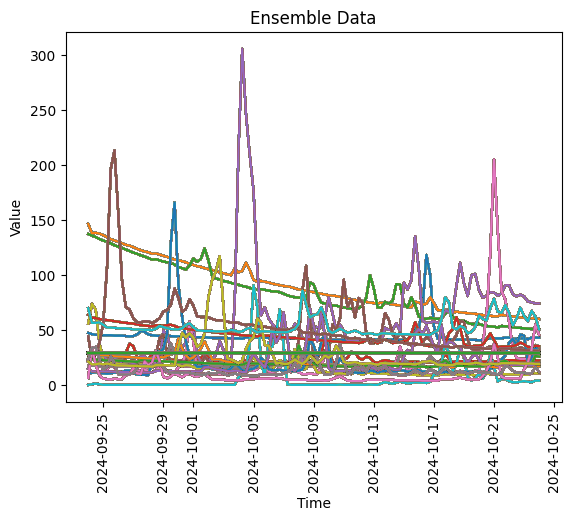

In [16]:
import matplotlib.pyplot as plt
import datetime

def graph_ensemble_data(response_data):
  """Graphs ensemble data from a DRF response.

  Args:
    response_data: A dictionary containing the DRF response data.
  """

  if 'results' in response_data and response_data['results']:

    for result in response_data['results']:

      if 'events' in result and result['events']:
        for event in result['events']:
          times = []
          values = []
          for value in result['events']:
              datetime_str = f"{value['date']} {value['time']}"
              datetime_obj = datetime.datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
              times.append(datetime_obj)
              values.append(value['value'])
          plt.plot(times, values)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Ensemble Data')
    plt.xticks(rotation='vertical')
    plt.show()


#pprint(response.json())
graph_ensemble_data(response.json())


## Summary

In this notebook, we learned how to use the HEFS API to retrieve data from the HEFS data store. We also learned how to use the API to filter results based on specific fields like `location_id`, `parameter_id`, and many more. The API filters on all available fields by appending the field name and value to the URI as query parameters.

These techniques can be used to retrieve, filter, and paginate data from all resources the HEFS data store.  With one exception, the GraphQL interface, we cover that next.